# BURP 2022 SimpleITK Notebook

This example notebook will showcase some basic image processing using the SimpleITK library. Images will be displayed using itkWidgets.

SimpleITK **documentation** can be found here:
1. https://simpleitk.readthedocs.io/en/master/
2. https://simpleitk.org/doxygen/latest/html/index.html

SimpleITK **examples** can be found here:
1. https://simpleitk.readthedocs.io/en/master/link_examples.html

In [10]:
import os
import math
import numpy as np
import SimpleITK as sitk
import scipy.stats as stats
import matplotlib.pyplot as plt

from itkwidgets import view, compare
from mpl_toolkits.mplot3d import Axes3D

# Define the image path using the OS library so we can have paths that are independent of operating system
imagePath = os.path.join('images', 'HAND_CT.nii')

# Now load the image using SimpleITK
image = sitk.ReadImage(imagePath)

# Let's display the image using itkWidgets
view(image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageSS3; pr…

## Image Intensity Histogram

Let's take a closer look at the image's histogram, or the plot of the intensity values of our image's voxels. We'll also make use of numPy arrays to iterate through the image and plot the histogram.

95682560


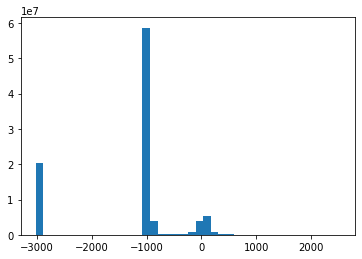

In [8]:
# This SimpleITK function returns our image as a numPy array
imageArray = sitk.GetArrayFromImage(image)

imageArray = imageArray.flatten()
minValue = np.amin(imageArray)
maxValue = np.amax(imageArray)
step = imageArray.size
print(step)

intensityValues = np.arange(minValue, maxValue, step)

# fig = plt.figure()
plt.hist(imageArray, 40)
plt.show()    

## Image Filtering

Let's run a simple Gaussian filter on our image. This will "smooth" our image to reduce the effect of image noise. Then we can compare our images before and after filtering to see how our image chnaged.

First we will create a new Gaussian filter object and set the necessary parameters before applying the filter to our image. We can find more info on this filter on the SimpleITK documentation here:
https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1DiscreteGaussianImageFilter.html

Then we will run the same filter again using the SimpleITK procedural interface.

In [11]:
# Create our filter object
gaussianFilter = sitk.DiscreteGaussianImageFilter()
gaussianFilter.SetVariance(2.0)
smoothImage1 = gaussianFilter.Execute(image)

# Now the SimpleITK procedural interface
smoothImage2 = sitk.DiscreteGaussian(image, 2.0)

# Let's compare our filtered image to our input image using itkWidgets
compare(image, smoothImage2)

AppLayout(children=(HBox(children=(Label(value='Link:'), Checkbox(value=False, description='cmap'), Checkbox(v…

### Gaussian Smoothing

Let's quickly generate a plot to show what a Gaussian distribution is to see how modifying the SimpleITK filter's variance parameter would affect our image!

Our Gaussian distribution in 3D is:


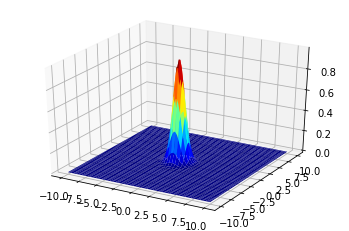

In [12]:
x = np.linspace(-10, 10, num=100)
y = np.linspace(-10, 10, num=100)

x, y = np.meshgrid(x, y)

z = np.exp( -(0.9 * x**2) - (0.9 * y**2) )

# Create the 3D figure using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap=plt.cm.jet)
plt.show()

## Image Segmentation

Image segmentation is the process of dividing an image into "segments", usually into two segments: foreground and background. This is called binary segmentation. There are many methods to perform binary image segmentation, but for simplicity we'll stick to the most simple method: manually selecting our thresholds or cutoff values where we define which voxel is foreground or background.

Using our hand CT image, let's define any voxel greater than 100 HU as bone and assign it a value of 1. Any value less than 500 will be considered background and given a value of 0. We will use our smoothed image as input.

In [13]:
# Let's just stick with the SimpleITK procedural interface this time
binaryImage = sitk.BinaryThreshold(smoothImage2, lowerThreshold=100, upperThreshold=10000, 
                                   insideValue=1, outsideValue=0)

view(binaryImage)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…